In [1]:
from upsetplot import *
from matplotlib import pyplot
import pandas as pd
import os

In [2]:
path= r"C:\Users\Axel\PycharmProjects\msp_v3\TOOLS\Generate_csv_from_original_files\output"

In [3]:
# path= r"C:\Users\Axel\Documents\DB Janvier 2024\DB_publi_graphs\clean\CSV"

In [4]:

concatenated_df = pd.DataFrame()

In [5]:
for files in os.listdir(path):
    if files.endswith(".csv") and files != "concats.csv":
        try:
            df = pd.read_csv(os.path.join(path,files), sep=";",quotechar='"', encoding="UTF-8")

            concatenated_df = pd.concat([concatenated_df, df], axis=0)
        except:
            continue

C:\Users\Axel\AppData\Local\Temp\ipykernel_26616\1665654617.py:4: DtypeWarning: Columns (1,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path,files), sep=";",quotechar='"', encoding="UTF-8")
C:\Users\Axel\AppData\Local\Temp\ipykernel_26616\1665654617.py:4: DtypeWarning: Columns (2,3,8,9,11,13,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path,files), sep=";",quotechar='"', encoding="UTF-8")


In [6]:
concatenated_df = concatenated_df[concatenated_df['PREDICTED'] != 'true']

In [7]:
print(f"TOTAL SPECTRUMS FOR GRAPHS: {len(concatenated_df)}")

TOTAL SPECTRUMS FOR GRAPHS: 1469656


In [8]:
concatenated_df = concatenated_df[['FILENAME', 'INCHIKEY']]

In [9]:
# Utilisez la méthode rename() avec des expressions régulières
concatenated_df["FILENAME"] = concatenated_df["FILENAME"].replace(r'.*MSMS_.*', 'RIKEN', regex=True)
concatenated_df["FILENAME"] = concatenated_df["FILENAME"].replace(r'.*MoNA.*', 'MoNA', regex=True)
concatenated_df["FILENAME"] = concatenated_df["FILENAME"].replace(r'.*XML_.*', 'HMDB', regex=True)
concatenated_df["FILENAME"] = concatenated_df["FILENAME"].replace(r'.*MassBank.*', 'MassBank', regex=True)
concatenated_df["FILENAME"] = concatenated_df["FILENAME"].replace(r'.*ALL_GNPS.*', 'GNPS', regex=True)
concatenated_df["FILENAME"] = concatenated_df["FILENAME"].replace(r'.*HMDB.*', 'HMDB', regex=True)
concatenated_df["FILENAME"] = concatenated_df["FILENAME"].replace(r'.*UNPD.*', 'UNPD', regex=True)

In [10]:

# Créez une nouvelle colonne d'index
nouvel_index = range(1, len(concatenated_df) + 1)

In [11]:

# Ajoutez cette colonne d'index au DataFrame pivot_df
concatenated_df['Index'] = nouvel_index

In [12]:

# Réorganisez les colonnes pour mettre la nouvelle colonne d'index en première position
df = concatenated_df[['Index'] + [col for col in concatenated_df.columns if col != 'Index']]

In [13]:
# Utilisez la fonction pivot pour réorganiser les données
pivot_df = df.pivot(index='Index', columns='FILENAME', values='INCHIKEY')

In [14]:
print(pivot_df)

FILENAME GNPS                         HMDB MassBank MoNA  \
Index                                                      
1         NaN  TYEYBOSBBBHJIV-UHFFFAOYSA-N      NaN  NaN   
2         NaN  TYEYBOSBBBHJIV-UHFFFAOYSA-N      NaN  NaN   
3         NaN  TYEYBOSBBBHJIV-UHFFFAOYSA-N      NaN  NaN   
4         NaN  TYEYBOSBBBHJIV-UHFFFAOYSA-N      NaN  NaN   
5         NaN  TYEYBOSBBBHJIV-UHFFFAOYSA-N      NaN  NaN   
...       ...                          ...      ...  ...   
1469652   NaN                          NaN      NaN  NaN   
1469653   NaN                          NaN      NaN  NaN   
1469654   NaN                          NaN      NaN  NaN   
1469655   NaN                          NaN      NaN  NaN   
1469656   NaN                          NaN      NaN  NaN   

FILENAME                        RIKEN  
Index                                  
1                                 NaN  
2                                 NaN  
3                                 NaN  
4                  

In [15]:
# Remplacez les valeurs non définies par une chaîne vide
pivot_df = pivot_df.fillna('')

In [16]:
pivot_df = pivot_df.to_dict('list')

In [17]:
for key,val in pivot_df.items():
    print(key)
    pivot_df[key] = list(set(val))

GNPS
HMDB
MassBank
MoNA
RIKEN


In [18]:
print(pivot_df)

{'GNPS': ['', 'XJKIBJFVLHQLKC-UHFFFAOYSA-N', 'LHDWRKICQLTVDL-UHFFFAOYSA-N', 'NRQJFEDEWHTAPZ-UGUGPVJNSA-N', 'DRKWUQGWCYRVJI-ZPUQHVIOSA-N', 'LEKZGIKUMGLSFP-UHFFFAOYSA-N', 'FPMIEPCWEZBKGP-UHFFFAOYSA-N', 'QYPABEUQMXOENV-NMOSBCMXSA-N', 'LNZRIIIDRGIMHV-CBDOUEBYSA-N', 'BFRBGRATLDMPFZ-OHJHOAMWSA-N', 'SHZGCJCMOBCMKK-DHVFOXMCSA-N', 'WRYJYFCCMSVEPQ-UHFFFAOYSA-N', 'IUXPJEGUIUKQQB-UHFFFAOYSA-N', 'PFMGWOVPHHEHAL-UHFFFAOYSA-N', 'ZFXYFBGIUFBOJW-UHFFFAOYSA-N', 'CCIUIWFXXDCCOJ-UHFFFAOYSA-N', 'ZFABEUFWUOOQMI-UHFFFAOYSA-N', 'FVWJYYTZTCVBKE-UHFFFAOYSA-N', 'PHEWILLIAJUBQE-UHFFFAOYSA-N', 'AOZKTJDXDYSFAE-FNORWQNLSA-N', 'ZZEANNAZZVVPKU-UHFFFAOYSA-N', 'PKAUQLRHGHNHIE-YWAWVVHHSA-N', 'ALTRINCJVPIQNK-UHFFFAOYSA-N', 'ADVPTQAUNPRNPO-REOHCLBHSA-N', 'CRDPBNXZCCAKEM-XLNONWJRSA-N', 'KYVJVURXKAZJRK-UHFFFAOYSA-N', 'WVETXGXKZHRROU-FCKIEFGQSA-N', 'WOBPBTDFDODUKX-HVEJSODHSA-N', 'ANJTVLIZGCUXLD-UHFFFAOYSA-N', 'DIEUZIPSDUGWLD-UHFFFAOYSA-N', 'OFUTZNNUWRTXHO-RQGSMOOYSA-N', 'RMSKZOXJAHOIER-RQTAXCTMSA-N', 'ZHVSXWCIYWYBQP-UHFFFAOYS

In [19]:
upset_data = from_contents(pivot_df)

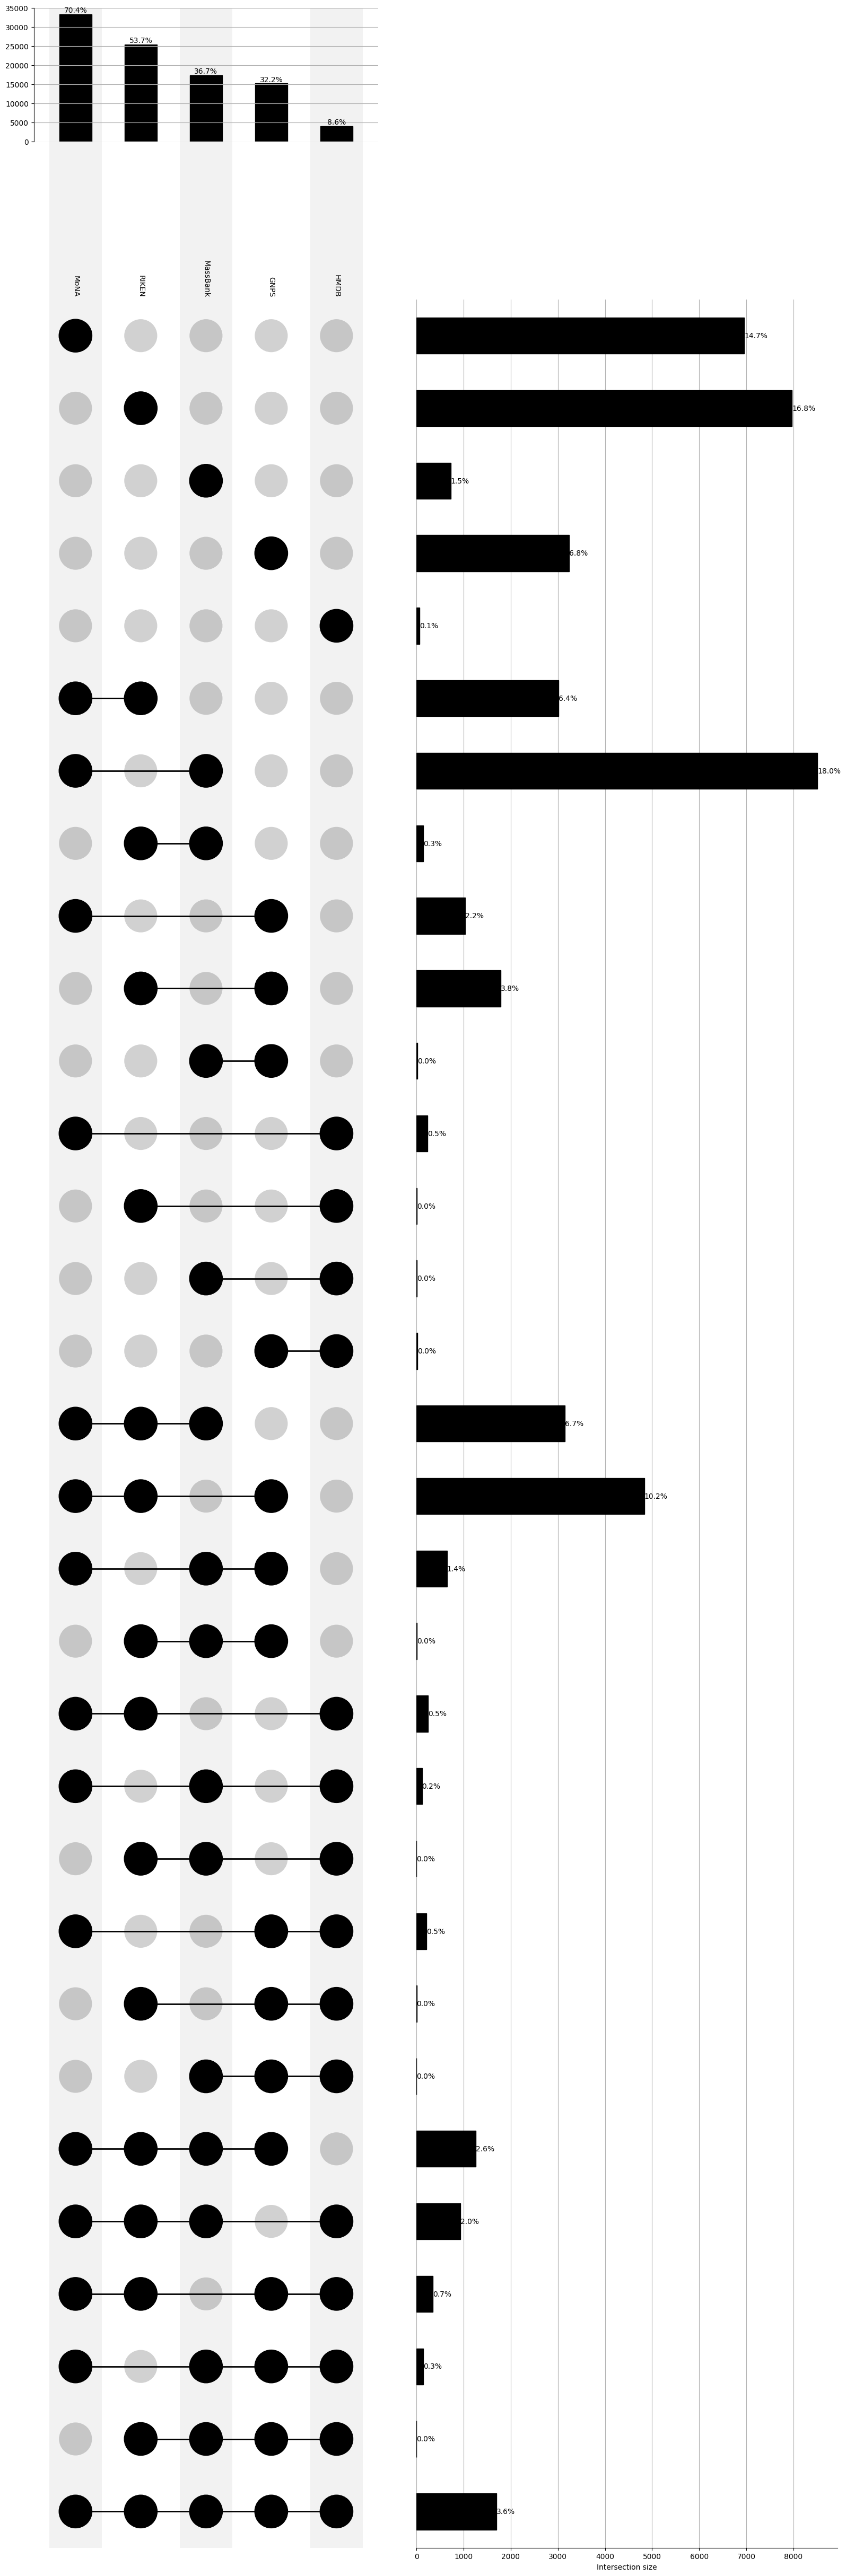

In [20]:
ax_dict = UpSet(upset_data, orientation="vertical", subset_size='count', show_percentages=True, element_size=128).plot()